<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [1]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [2]:
# Write your code here
# 1. Overview of data types and non-null counts
print("--- Dataset Information ---")
df.info(verbose=True)

# 2. Detailed count of missing values per column
print("\n--- Missing Values Count (Top 20) ---")
missing_values = df.isnull().sum()
print(missing_values.sort_values(ascending=False).head(20))

# 3. Quick check of Data Types
print("\n--- Column Data Types Summary ---")
print(df.dtypes.value_counts())

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                  

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [ ]:
# Write your code here
# Generate summary statistics for numerical columns
numerical_stats = df.describe()

# Display the statistics
print(numerical_stats)

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000 

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [ ]:
# Write your code here
df['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

In [ ]:
# Strip spaces and normalize case to see if counts change
df['Country'] = df['Country'].str.strip()

# List unique values to manually spot outliers or "None/Other"
print(df['Country'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [ ]:
# Identify countries with very few respondents
country_counts = df['Country'].value_counts()
small_entries = country_counts[country_counts < 5]
print("Countries with fewer than 5 respondents:")
print(small_entries)

Countries with fewer than 5 respondents:
Country
Lao People's Democratic Republic         4
Liechtenstein                            4
Fiji                                     4
Gabon                                    4
Bahamas                                  4
Swaziland                                4
Burkina Faso                             4
Liberia                                  4
Libyan Arab Jamahiriya                   4
San Marino                               3
Sierra Leone                             3
Democratic Republic of the Congo         3
Burundi                                  3
Bhutan                                   3
Monaco                                   3
Guyana                                   3
North Korea                              3
Brunei Darussalam                        3
Democratic People's Republic of Korea    2
Mali                                     2
Guinea-Bissau                            2
Belize                                   2
Domin

In [ ]:
# Search for entries containing dots or unusual characters
truncated_data = df[df['Country'].str.contains('\.\.\.', na=False)]
print(truncated_data['Country'].unique())

['Iran, Islamic Republic of...' 'Venezuela, Bolivarian Republic of...'
 'Congo, Republic of the...' 'Micronesia, Federated States of...']


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [ ]:
## Write your code here
print(df['EdLevel'].value_counts())

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64


In [ ]:
# Define the mapping (Old Value : New Value)
ed_mapping = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master',
    'Secondary school (e.g. American high school, German Realschule, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Undergrad (No Degree)',
    'Professional degree (JD, MD, etc.)': 'Professional',
    'Associate degree (A.A., A.S., etc.)': 'Associate'
}

# Apply the mapping
# map() will turn anything NOT in your dictionary into NaN
# replace() will only change the ones you specified and keep the rest as-is
df['EdLevel'] = df['EdLevel'].replace(ed_mapping)

print(df['EdLevel'].value_counts())

EdLevel
Bachelor                                                                              24942
Master                                                                                15557
Undergrad (No Degree)                                                                  7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate                                                                              1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64


In [ ]:
country_mapping = {
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA',
    'Micronesia, Federated States of...': 'Micronesia'
}

df['Country'] = df['Country'].replace(country_mapping)

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [ ]:
## Write your code here
# 1. Apply one-hot encoding
# columns=['Employment'] tells pandas which column to transform
# prefix='Emp' adds a short prefix to the new column names for clarity
df = pd.get_dummies(df, columns=['Employment'], prefix='Emp')

# 2. Verify the results
# Look for the new columns starting with 'Emp_'
print("New One-Hot Encoded columns:")
print(df.filter(like='Emp_').columns.tolist())

# 3. View the first few rows of these new binary columns
print("\nSample of encoded data:")
print(df.filter(like='Emp_').head())


New One-Hot Encoded columns:
['Emp_Employed, full-time', 'Emp_Employed, full-time;Employed, part-time', 'Emp_Employed, full-time;Independent contractor, freelancer, or self-employed', 'Emp_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time', 'Emp_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired', 'Emp_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work', 'Emp_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time', 'Emp_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time', 'Emp_Employed, full-time;Independent contractor, freelancer, or self-employed;Retired', 'Emp_Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time', 'Emp_Employed, full-time;

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [ ]:
## Write your code here
# 1. Calculate missing values for all columns
missing_data = df.isnull().sum()

# 2. Sort them in descending order (highest first)
sorted_missing = missing_data.sort_values(ascending=False)

# 3. Display the top 10 columns with the most missing values
print("Top 10 columns with the highest missing values:")
print(sorted_missing.head(10))

Top 10 columns with the highest missing values:
AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [3]:
# 5.2 Impute missing values in ConvertedCompYearly using the median
print("Missing ConvertedCompYearly (before):", df['ConvertedCompYearly'].isnull().sum())

median_salary = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_salary)

print("Missing ConvertedCompYearly (after):", df['ConvertedCompYearly'].isnull().sum())


Missing ConvertedCompYearly (before): 42002
Missing ConvertedCompYearly (after): 0


In [ ]:
## Write your code here
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Fill NaNs with the median of each column
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

print("Imputation complete for all numerical columns.")

Imputation complete for all numerical columns.


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [ ]:
## Write your code here
remote_mode = df['RemoteWork'].mode()[0]
# Replace missing values in the RemoteWork column
df['RemoteWork'] = df['RemoteWork'].fillna(remote_mode)

# Verify the change
print(f"Missing values remaining in RemoteWork: {df['RemoteWork'].isnull().sum()}")

Missing values remaining in RemoteWork: 0


In [ ]:
# See the distribution before filling
print(df['RemoteWork'].value_counts(normalize=True))

RemoteWork
Hybrid (some remote, some in-person)    0.514174
Remote                                  0.318337
In-person                               0.167489
Name: proportion, dtype: float64


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [ ]:
## Write your code here
# 1. Identify the min and max values of the column
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()

# 2. Apply the Min-Max Scaling formula
# This creates a new column with the normalized values
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)

# 3. Verify the transformation
# The 'min' should be 0.0 and 'max' should be 1.0
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].describe())

       ConvertedCompYearly  ConvertedCompYearly_MinMax
count         6.543700e+04                65437.000000
mean          7.257636e+04                    0.004464
std           1.122207e+05                    0.006903
min           1.000000e+00                    0.000000
25%           6.500000e+04                    0.003998
50%           6.500000e+04                    0.003998
75%           6.500000e+04                    0.003998
max           1.625660e+07                    1.000000


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [ ]:
## Write your code here
import numpy as np

# 1. Apply the log transformation
# We use log1p to handle any potential zero values safely
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])

# 2. Compare the skewness
print(f"Original Skewness: {df['ConvertedCompYearly'].skew():.2f}")
print(f"Log-Transformed Skewness: {df['ConvertedCompYearly_Log'].skew():.2f}")

# 3. Check the summary statistics
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Log']].describe())

Original Skewness: 87.71
Log-Transformed Skewness: -4.28
       ConvertedCompYearly  ConvertedCompYearly_Log
count         6.543700e+04             65437.000000
mean          7.257636e+04                10.976053
std           1.122207e+05                 0.851456
min           1.000000e+00                 0.693147
25%           6.500000e+04                11.082158
50%           6.500000e+04                11.082158
75%           6.500000e+04                11.082158
max           1.625660e+07                16.604010


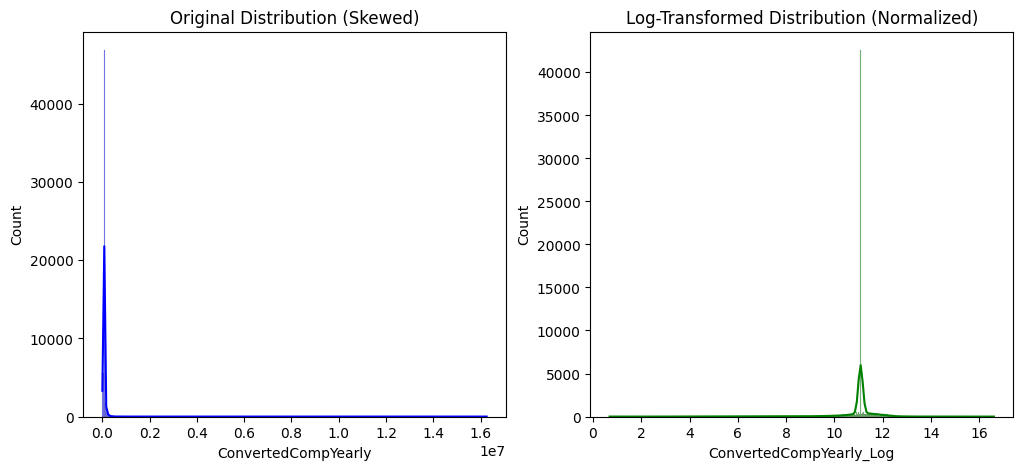

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Skewed Data
sns.histplot(df['ConvertedCompYearly'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Original Distribution (Skewed)')

# Log-Transformed Data
sns.histplot(df['ConvertedCompYearly_Log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Log-Transformed Distribution (Normalized)')

plt.show()

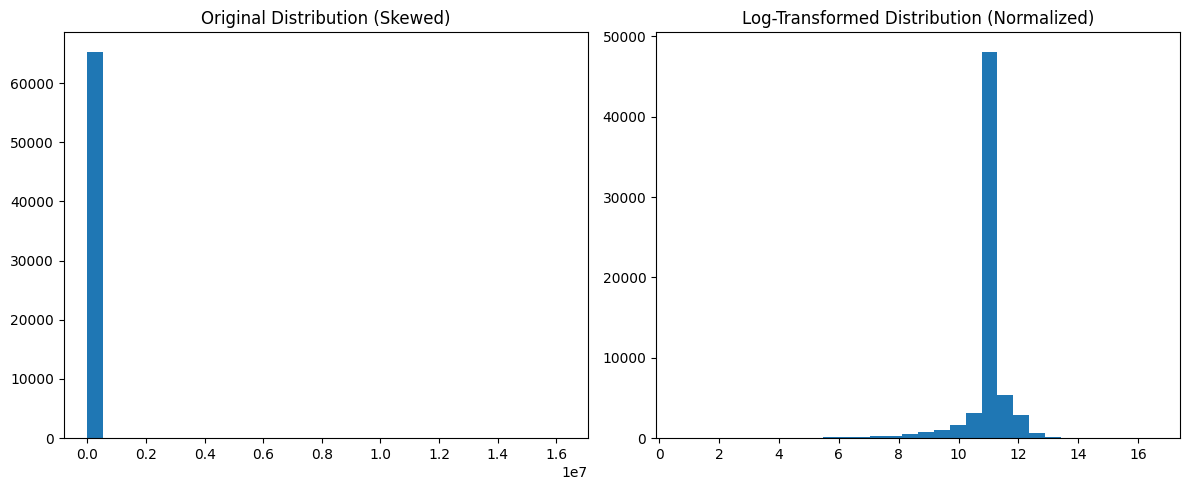

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure ConvertedCompYearly exists and has no missing values
df = df.dropna(subset=['ConvertedCompYearly'])

# Create log column if it doesn't exist
if 'ConvertedCompYearly_Log' not in df.columns:
    df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['ConvertedCompYearly'], bins=30)
axes[0].set_title('Original Distribution (Skewed)')

axes[1].hist(df['ConvertedCompYearly_Log'], bins=30)
axes[1].set_title('Log-Transformed Distribution (Normalized)')

plt.tight_layout()
plt.show()


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [ ]:
## Write your code here
# Convert strings to numeric, forcing errors to NaN
df['YearsCodePro_num'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Optional: Handle the text-based entries manually if needed
# (e.g., 'Less than 1 year' -> 0, 'More than 50 years' -> 51)
df['YearsCodePro_num'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
df['YearsCodePro_num'] = pd.to_numeric(df['YearsCodePro_num'], errors='coerce')

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
